In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [3]:
books = pd.read_csv(r"C:\Users\ayush\Downloads\BooksDataSet.csv")
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
# removing the unnamed : 0

books = books[['book_id', 'book_name', 'genre', 'summary']]
books.head(3)

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

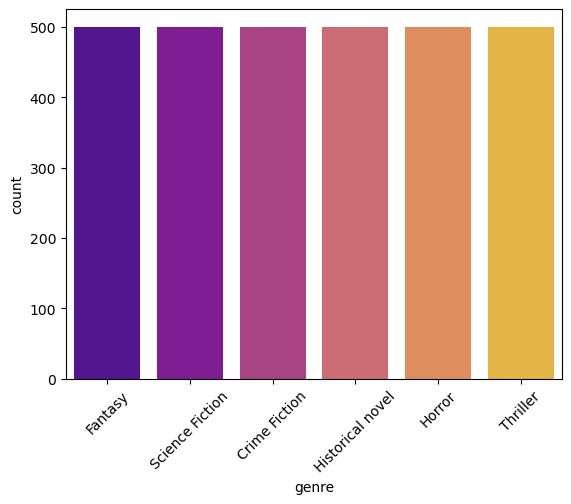

In [9]:
sn.countplot(x = books['genre'],palette='plasma')
plt.xticks(rotation = 45)

In [10]:
books['summary'].iloc[1]

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

In [11]:
## cleaning the text

def cleantext(text):
    
    # removing the "\"
    
    text = re.sub("'\''","",text)
    
    # removing special symbols
    
    text = re.sub("[^a-zA-Z]"," ",text)
    
    # removing the whitespaces
    
    text = ' '.join(text.split())
    
    # convert text to lowercase
    
    text = text.lower()
    
    return text


    
books['summary'] = books['summary'].apply(lambda x:cleantext(x))
books['summary'].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

#### Plotting the most Frequent Words

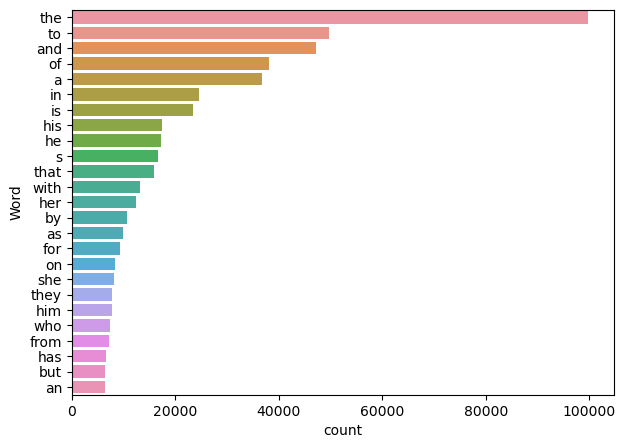

In [12]:
def showmostfrequentwords(text,no_of_words):
    
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf
    
    
# 25 most frequent words

wordsdf = showmostfrequentwords(books['summary'],25)

In [13]:
wordsdf.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
3,the,99808
17,to,49665
14,and,47183
46,of,38003
23,a,36749
80,in,24496
2,is,23358
49,his,17464
51,he,17210
12,s,16710


### Removing the stopwords

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# removing the stopwords

def removestopwords(text):
    
    removedstopword = [word for word in text.split() if word not in stop_words]
    return ' '.join(removedstopword)

books['summary'] = books['summary'].apply(lambda x:removestopwords(x))
books['summary'].iloc[1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


'book opens jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turns venti storm spirit attacks trio trip leader coach gleeson hedge ensuing fight jason surprises everyone including one coins turns sword uses battle storm spirits coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turns jason shoe destroyed fight jason piper leo told demigods taken back camp half blood meet greek demigod children like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tells champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon dis

## Lemmatizing

In [15]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...


True

In [16]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['summary'] = books['summary'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...


## Stemming 

In [17]:
# Approach 

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):
    
    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence+=stem
        stemmed_sentence+=" "
        
    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

books['summary'] = books['summary'].apply(lambda text:stemming(text))
books['summary'].iloc[1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thalia

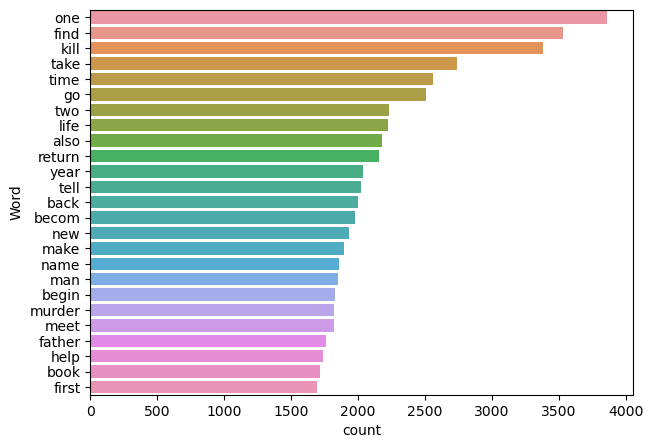

In [18]:
# visualising frewords

freq_df = showmostfrequentwords(books['summary'],25)

In [19]:
freq_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
242,one,3858
230,find,3533
240,kill,3380
153,take,2743
1143,time,2563
88,go,2509
38,two,2235
418,life,2224
415,also,2179
407,return,2158


##  Encoding

In [20]:
books_list = list(books['genre'].unique())
encode = [i for i in range(len(books_list))]
mapper = dict(zip(books_list,encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


In [21]:
books['genre'] = books['genre'].map(mapper)
books['genre'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

## Model Building

In [22]:
## count vectorizer

count_vec = CountVectorizer(max_df=0.90,min_df=2,
                           max_features=1000,stop_words='english')

bagofword_vec = count_vec.fit_transform(books['summary'])
bagofword_vec

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 245387 stored elements in Compressed Sparse Row format>

In [23]:
test = books['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec,test,
                                                    test_size=0.2)
X_train.shape,X_test.shape

((2400, 1000), (600, 1000))

In [24]:
svc = SVC()
svc.fit(X_train,y_train)
svccpred = svc.predict(X_test)
print(metrics.accuracy_score(y_test,svccpred))

0.5866666666666667


In [25]:
mb = MultinomialNB()
mb.fit(X_train,y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test,mbpred))

0.665


In [26]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,rf.predict(X_test)))

0.6316666666666667


## Part 2 Model Building

 + Changing from Countvectorizer to TFDIF vectorizer

In [27]:
#Labeling each 'genre' with an unique number 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(books['genre'])

X_train,X_test,y_train,y_test = train_test_split(books['summary']
                                                ,y,test_size=0.2,
                                                random_state=557)

X_train.shape,X_test.shape

((2400,), (600,))

In [28]:
#Performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [29]:
svc = SVC()
svc.fit(xtrain_tfidf,y_train)
svccpred = svc.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,svccpred))

0.775


In [30]:
mb = MultinomialNB()
mb.fit(xtrain_tfidf,y_train)
mbpred = mb.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,mbpred))

0.78


## Testing the Model

In [31]:
def test(text,model):
    
    text = cleantext(text)
    text = removestopwords(text)
    text = lematizing(text)
    text = stemming(text)
    
    text_vector = tfidf_vectorizer.transform([text])
    predicted = model.predict(text_vector)
    return predicted



ans = books['summary'].apply(lambda text:test(text,mb))

# printing the 
# print(list(mapper.keys())[list(mapper.values()).index(ans)])

ans

0       [0]
1       [0]
2       [0]
3       [0]
4       [0]
       ... 
2995    [1]
2996    [5]
2997    [5]
2998    [5]
2999    [5]
Name: summary, Length: 3000, dtype: object

In [32]:
predicted_genres = []
for i in range(len(ans)):
    
    index_val = ans[i][0]
    predicted_genres.append(list(mapper.keys())[list(mapper.values()).index(index_val)])
    

In [33]:
mapper

{'Fantasy': 0,
 'Science Fiction': 1,
 'Crime Fiction': 2,
 'Historical novel': 3,
 'Horror': 4,
 'Thriller': 5}

In [34]:
## mapping the training genre as well

newmap = dict([(value,key) for key,value in mapper.items()])
newmap

{0: 'Fantasy',
 1: 'Science Fiction',
 2: 'Crime Fiction',
 3: 'Historical novel',
 4: 'Horror',
 5: 'Thriller'}

In [35]:
print(newmap)

{0: 'Fantasy', 1: 'Science Fiction', 2: 'Crime Fiction', 3: 'Historical novel', 4: 'Horror', 5: 'Thriller'}


In [36]:
books['Actual Genre'] = books['genre'].map(newmap)
books['Predicted_genre'] = np.array(predicted_genres)
books.head()

,book_id,book_name,genre,summary,Actual Genre,Predicted_genre
0,3248537,Drowned Wednesday,0,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,27796919,The Lost Hero,0,book open jason awaken school bu unabl rememb ...,Fantasy,Fantasy
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,5969644,Magic's Promise,0,book open herald mage vanyel return countri va...,Fantasy,Fantasy
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy


In [37]:
books = books[['book_name','summary','Actual Genre','Predicted_genre']]
books

,book_name,summary,Actual Genre,Predicted_genre
0,Drowned Wednesday,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,The Lost Hero,book open jason awaken school bu unabl rememb ...,Fantasy,Fantasy
2,The Eyes of the Overworld,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,Magic's Promise,book open herald mage vanyel return countri va...,Fantasy,Fantasy
4,Taran Wanderer,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy
...,...,...,...,...
2995,White Death,novel numa file kurt austin adventur novel mai...,Thriller,Science Fiction
2996,Venus with Pistol,gilbert kemp dealer special antiqu gun london ...,Thriller,Thriller
2997,Blackwater,know deep davey alway live shadow older brothe...,Thriller,Thriller
2998,The Rainbow and the Rose,stori concern life johnni pasco retir commerci...,Thriller,Thriller


In [46]:
dict(Counter(books['Actual Genre'].values))

{'Fantasy': 500,
 'Science Fiction': 500,
 'Crime Fiction': 500,
 'Historical novel': 500,
 'Horror': 500,
 'Thriller': 500}

In [47]:
dict(Counter(books['Predicted_genre'].values))

{'Fantasy': 462,
 'Science Fiction': 536,
 'Thriller': 477,
 'Horror': 504,
 'Historical novel': 501,
 'Crime Fiction': 520}

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Historical novel'),
  Text(5, 0, 'Crime Fiction')])

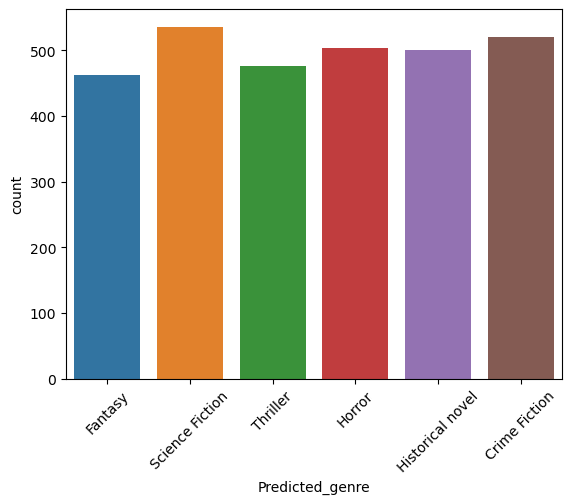

In [48]:
sn.countplot(x = books['Predicted_genre'])
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

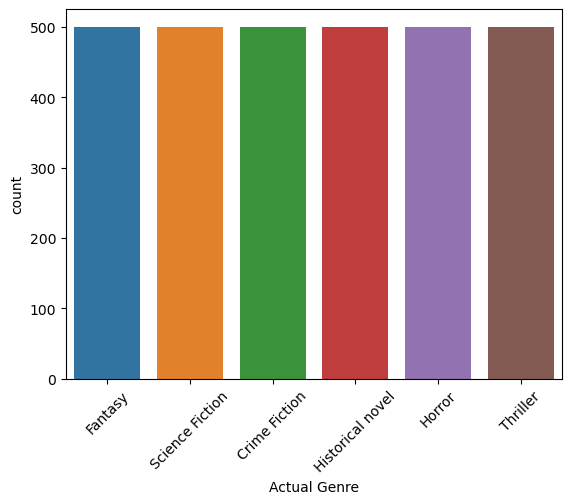

In [49]:
sn.countplot(x = books['Actual Genre'])
plt.xticks(rotation = 45)

In [50]:
# saving the model

import pickle
file = open('bookgenremodel.pkl','wb')
pickle.dump(mb,file)
file.close()

In [51]:
books['summary'].iloc[1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thalia

In [52]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.8, max_features=10000)

In [53]:
file = open('tfdifvector.pkl','wb')
pickle.dump(tfidf_vectorizer,file)
file.close()

In [54]:
wordnet_down = nltk.download('wordnet',download_dir='./')
wordnet_down

[nltk_data] Downloading package wordnet to ./...


True

In [55]:
nltk.download('stopwords',download_dir='./')

[nltk_data] Downloading package stopwords to ./...
[nltk_data]   Unzipping corpora\stopwords.zip.


True